In [1]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [12]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["LTC-USD", "ETH-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [13]:
data.index = pd.to_datetime(data.index)
data.head()

LTC-USD                                     ETH-USD           \
               Open     High      Low    Close   Volume    Open High Low   
Date                                                                       
2014-09-17  5.08589  5.17077  4.96595  5.05855  3071840     NaN  NaN NaN   
2014-09-18  5.06543  5.06543  4.57996  4.68523  4569260     NaN  NaN NaN   
2014-09-19  4.68729  4.75582  4.25435  4.32777  3917450     NaN  NaN NaN   
2014-09-20  4.32920  4.61608  4.20219  4.28644  5490660     NaN  NaN NaN   
2014-09-21  4.26307  4.30013  4.15499  4.24592  2931220     NaN  NaN NaN   

                         
           Close Volume  
Date                     
2014-09-17   NaN    NaN  
2014-09-18   NaN    NaN  
2014-09-19   NaN    NaN  
2014-09-20   NaN    NaN  
2014-09-21   NaN    NaN

In [14]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

LTC-USD                                                   \
               Open     High      Low    Close   Volume daily_return   
Date                                                                   
2015-08-07  4.06334  4.22069  3.97027  4.20828  4192810          NaN   
2015-08-08  4.22099  4.22364  3.83542  3.85475  4917730    -0.084008   
2015-08-09  3.84339  3.98426  3.81139  3.89859  3064680     0.011373   
2015-08-10  3.90080  3.98013  3.89761  3.94888  2239890     0.012900   
2015-08-11  3.94874  4.15955  3.94295  4.15955  3426300     0.053349   

             ETH-USD                                                        
                Open      High       Low     Close     Volume daily_return  
Date                                                                        
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN  
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250  
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268  
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333  
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323

In [15]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.045060,1.082218,0.982737,1.054553,1.083288,1.037613,1.057481,0.911245,1.002433,1.089203,...,1.086331,0.994930,1.010810,1.019047,1.029551,1.015937,1.026376,1.014018,0.988034,0.945683
2,1.079401,1.151195,1.011175,1.048641,1.011040,1.054451,1.029124,0.920635,1.021977,1.141194,...,1.084094,1.078825,1.033174,1.000425,1.040415,1.005593,1.032588,1.045226,1.014206,0.980322
3,1.138319,1.154178,0.945136,1.072709,0.993130,0.954842,1.002036,0.846940,0.997572,1.112320,...,1.049128,1.016862,1.000631,0.949760,1.073225,1.082098,1.051350,1.074053,1.080802,1.000289
4,1.069712,1.121295,0.928464,0.968063,0.997301,0.985503,1.082183,0.906109,1.000540,1.089675,...,1.042146,1.033108,1.064943,0.883460,1.091743,1.142579,1.186211,1.063773,1.087492,0.992703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5354.527590,338.620463,10.148149,862.675031,229.104483,950.244280,24.448521,22.159354,3.145156,6.650119,...,787.367445,2.810124,375.410454,4606.867484,14.442061,42.797731,7.417539,14.129139,91.953601,8.600262
2517,5822.475025,346.163147,10.732014,964.943900,216.324033,865.968233,25.547537,21.157406,3.284838,7.022146,...,782.330384,2.834352,405.646865,4349.743990,14.281354,46.704049,7.816148,13.833347,91.984645,8.811933
2518,5323.693796,348.477352,10.701203,971.582881,209.132575,850.518369,26.276728,20.699958,3.411272,6.956341,...,795.944090,2.701470,409.699112,4309.050519,14.152024,48.018699,7.498340,13.374380,96.255302,8.613621
2519,5643.508339,344.017088,10.944478,1025.996164,186.919967,817.636285,28.022898,19.695108,3.396187,6.385262,...,753.293197,3.044755,409.108765,3955.512839,14.516613,45.138720,7.622682,13.135407,90.639399,8.824523


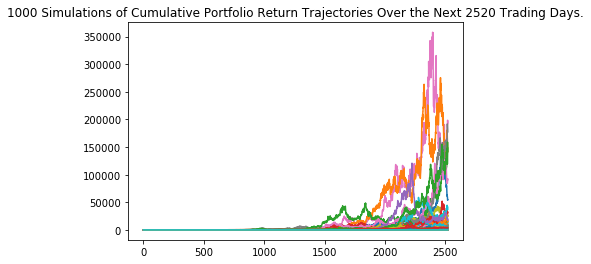

In [16]:
line_plot = MC_even_dist.plot_simulation()

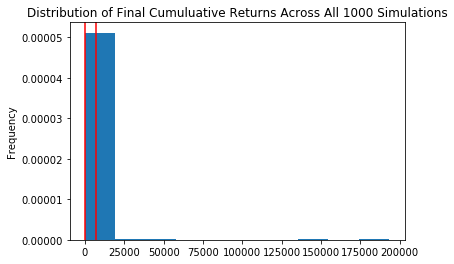

In [17]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count             1000.000000
mean              1692.674268
std              12149.653037
min                  0.006775
25%                  6.559063
50%                 48.272022
75%                328.217421
max             193331.152201
95% CI Lower         0.205081
95% CI Upper      7215.253773
Name: 2520, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 10 years will end within in the range of $3076.21 and $108228806.6.


In [20]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

LTC-USD                                                   \
               Open     High      Low    Close   Volume daily_return   
Date                                                                   
2015-08-07  4.06334  4.22069  3.97027  4.20828  4192810          NaN   
2015-08-08  4.22099  4.22364  3.83542  3.85475  4917730    -0.084008   
2015-08-09  3.84339  3.98426  3.81139  3.89859  3064680     0.011373   
2015-08-10  3.90080  3.98013  3.89761  3.94888  2239890     0.012900   
2015-08-11  3.94874  4.15955  3.94295  4.15955  3426300     0.053349   

             ETH-USD                                                        
                Open      High       Low     Close     Volume daily_return  
Date                                                                        
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN  
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250  
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268  
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333  
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323

In [21]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.150777,0.913141,1.022838,1.027118,0.883602,0.984616,1.058466,0.952788,0.972942,1.073077,...,1.040188,0.980139,1.047514,1.101188,1.047103,0.957757,1.043892,1.008966,0.975315,1.108711
2,1.138021,0.987074,0.973303,1.092859,0.971452,1.013597,1.108708,0.949141,1.023909,1.205287,...,0.950106,0.985204,1.002239,1.220783,1.079774,0.922334,1.155046,1.013146,1.024116,1.075838
3,1.183290,0.994618,0.981175,1.060701,0.977680,0.896910,1.216151,0.986201,0.937030,1.229965,...,0.990495,0.952731,1.089245,1.363814,1.101682,0.971658,1.104176,0.885206,0.945485,0.996671
4,1.164150,0.939618,0.904502,1.014979,0.925671,0.993741,1.178526,0.921101,0.985184,1.319015,...,0.962732,0.960855,1.043952,1.306613,1.144328,1.109795,1.139107,0.865816,1.040775,0.947131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,25.511358,10.986250,16371.310690,0.171972,34.714010,69.176749,423.475045,8.497739,10.118292,2.294994,...,258.349803,27.877298,29.701714,12.533624,243.659748,2.407948,260.686049,2.708883,82.153130,210.481289
1257,27.962257,10.286283,14764.853145,0.181500,35.727335,65.762264,438.506152,8.193070,10.833133,2.379022,...,301.232850,28.622765,28.630285,10.520232,222.760292,2.508847,289.477841,2.464343,81.113205,218.320147
1258,27.734069,10.943898,13759.027325,0.186390,37.131252,63.511076,425.204928,7.886271,10.807955,2.424355,...,292.170557,26.103948,29.888051,10.985619,220.900507,2.349557,274.322453,2.240225,78.199087,204.444484
1259,30.811499,10.921725,12651.892991,0.151000,40.029835,68.237593,425.257430,8.450031,11.322536,2.446573,...,325.867554,27.991784,30.427365,11.231932,223.187439,2.314468,278.095506,2.087563,78.958163,208.856620


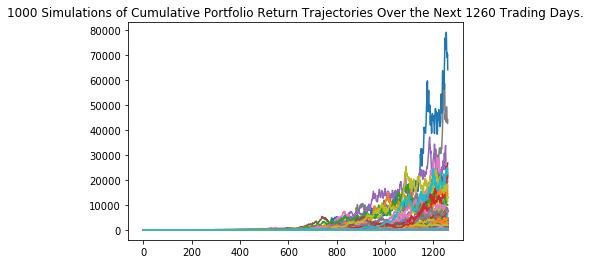

In [23]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

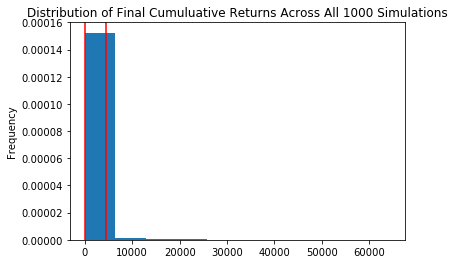

In [24]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count            1000.000000
mean              669.985896
std              3315.573604
min                 0.021104
25%                10.339092
50%                45.845986
75%               233.606797
max             64224.287049
95% CI Lower        0.488712
95% CI Upper     4453.274719
Name: 1260, dtype: float64


In [26]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $7330.68 and $66799120.78.


In [27]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*15
)
MC_even_dist.portfolio_data.head()

LTC-USD                                                   \
               Open     High      Low    Close   Volume daily_return   
Date                                                                   
2015-08-07  4.06334  4.22069  3.97027  4.20828  4192810          NaN   
2015-08-08  4.22099  4.22364  3.83542  3.85475  4917730    -0.084008   
2015-08-09  3.84339  3.98426  3.81139  3.89859  3064680     0.011373   
2015-08-10  3.90080  3.98013  3.89761  3.94888  2239890     0.012900   
2015-08-11  3.94874  4.15955  3.94295  4.15955  3426300     0.053349   

             ETH-USD                                                        
                Open      High       Low     Close     Volume daily_return  
Date                                                                        
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN  
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250  
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268  
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333  
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323

In [28]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
1,1.010218,0.992087,1.022546,1.035553e+00,1.112136e+00,1.033265,0.896269,1.033304e+00,9.943281e-01,9.543966e-01,...,0.947328,1.011755,0.973986,0.995858,1.004724e+00,8.986264e-01,9.126726e-01,9.795238e-01,1.006281e+00,1.032300
2,1.029260,1.023535,1.060526,1.049069e+00,1.170288e+00,1.003449,0.892141,9.494830e-01,8.924946e-01,9.180204e-01,...,0.937459,1.048474,1.073194,0.918394,1.010167e+00,8.897722e-01,9.318928e-01,9.215472e-01,1.033659e+00,1.142254
3,0.981912,1.125841,1.104926,1.148968e+00,1.049194e+00,1.033174,0.951706,9.876511e-01,9.354421e-01,9.513174e-01,...,0.843359,1.093783,1.071088,1.028713,1.053704e+00,8.843146e-01,9.160211e-01,9.077202e-01,1.082328e+00,1.326336
4,1.057870,1.091464,1.082674,1.119002e+00,1.058769e+00,1.006570,0.941723,9.531163e-01,1.025788e+00,1.123492e+00,...,0.770815,1.211224,1.034137,1.061697,1.090406e+00,8.304598e-01,9.702608e-01,9.512535e-01,1.076172e+00,1.376631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,347218.509812,151486.683904,57200.256319,9.382074e+07,1.078711e+06,94022.828879,714249.397307,5.379463e+06,2.966308e+06,4.160200e+06,...,1357.511792,200.370387,2208.228998,331264.068022,1.282009e+09,1.574470e+06,2.933659e+08,1.822797e+08,2.345003e+06,44740.839570
3777,328976.728201,158409.544749,63026.252826,9.944939e+07,1.114557e+06,101209.011428,717265.577523,5.337205e+06,2.750304e+06,4.356836e+06,...,1263.814938,216.848507,2197.586964,340776.825559,1.327614e+09,1.475491e+06,2.896221e+08,1.866559e+08,2.367922e+06,44706.938877
3778,338290.952926,181397.811072,62955.905313,9.890946e+07,9.790199e+05,95857.098843,697839.867575,5.729566e+06,2.726469e+06,3.901968e+06,...,1265.473575,203.343129,2391.445313,369943.414138,1.314326e+09,1.570770e+06,2.966067e+08,1.639391e+08,2.242812e+06,44017.217047
3779,322116.911988,183738.155712,62330.359874,9.639745e+07,9.569882e+05,94019.349684,730053.071524,6.090767e+06,2.752757e+06,3.828461e+06,...,1237.185417,192.877688,2444.515891,357688.895215,1.395871e+09,1.587442e+06,2.807685e+08,1.759049e+08,2.381405e+06,43315.088177


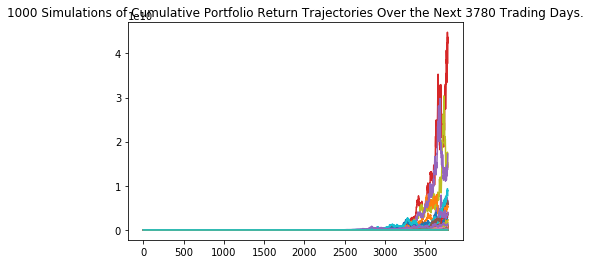

In [29]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

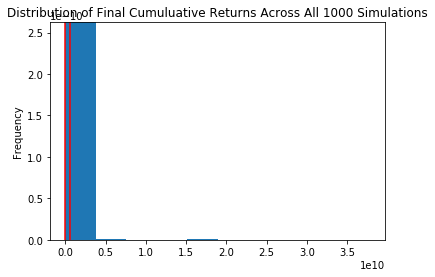

In [30]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            1.397649e+08
std             1.475805e+09
min             1.135277e-01
25%             1.195199e+04
50%             1.739176e+05
75%             2.567739e+06
max             3.782255e+10
95% CI Lower    2.738956e+01
95% CI Upper    5.320791e+08
Name: 3780, dtype: float64


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 15 years will end within in the range of $410843.4 and $7981187098658.8.
